# Librerias

In [32]:
#Normalmente se necesita reiniciar entorno de ejecución
!pip install tensorflow-text
!pip install tf-models-official

In [33]:
import tensorflow_text as text
import tensorflow_hub as hub
from official.nlp import optimization  # to create AdamW optimizer

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

## Montar Google Drive

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
RUTA = "/content/drive/MyDrive/Entrega-NLP-Bartolomé_Flores_Vicaria"

In [37]:
%cd "$RUTA"

/content/drive/MyDrive/Entrega-NLP-Bartolomé_Flores_Vicaria


In [38]:
from helper_functions import *

# Carga de datos

In [39]:
path_csv = "reviews_large_processed.csv"
df = pd.read_csv(path_csv, sep=';', decimal='.')

In [40]:
df.head()

,sentiment,review
0,4,came as promised even earlier works amazing lo...
1,2,Was disappointed in the size. It is much too b...
2,1,"Do not, I say DO NOT order. I miscalculated a..."
3,4,"I love this little powder puff! No, the lid do..."
4,4,I don't pick books apart. I rate simply on enj...


In [41]:
X_train, X_test, y_train, y_test = train_test_split(df['review'].to_numpy(),
                                                    df['sentiment'].to_numpy(),
                                                    train_size=0.1,
                                                    test_size=0.1,
                                                    shuffle=True,
                                                    stratify=df['sentiment'],
                                                    random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_test,
                                                y_test,
                                                test_size=0.5,
                                                shuffle=True,
                                                stratify=y_test,
                                                random_state=42)

print(f'Dimensiones del dataset de training:   {X_train.shape}')
print(f'Dimensiones del dataset de validation: {X_val.shape}')
print(f'Dimensiones del dataset de test:       {X_test.shape}')


Dimensiones del dataset de training:   (1978,)
Dimensiones del dataset de validation: (989,)
Dimensiones del dataset de test:       (990,)


In [42]:
words_train , words_val, words_test, labels_train ,labels_val , labels_test = preprocess_data(X_train, X_val , X_test , y_train, y_val, y_test)

Read preprocessed data from cache file: preprocessed_data.pkl


In [43]:
features_train, features_val, features_test, vocabulary = extract_BoW_features(words_train,words_val, words_test)

Read features from cache file: bow_features.pkl


In [73]:
len(vocabulary)

236

## Ejemplo carga de datos

In [44]:
print("Vocabulary: {} words".format(len(vocabulary)))

import random
print("Sample words: {}".format(random.sample(list(vocabulary.keys()), 8)))

print("\n--- Preprocessed words ---")
print(words_train[5])
print("\n--- Bag-of-Words features ---")
print(features_train[5])
print("\n--- Label ---")
print(labels_train[5])

Vocabulary: 236 words
Sample words: ['effect', 'right', 'fine', 'problem', 'expens', 'quit', 'glass', 'alway']

--- Preprocessed words ---
['look', 'legitim', 'studi', 'tri', 'avoid', 'bias', 'websit', 'inform', 'buy', 'product', 'studi', 'claim', 'heal', 'properti', 'say', 'otherwis', 'dislik', 'tast', 'said', 'contain', 'lot', 'antioxid', 'believ', 'benefici', 'bodi', 'like', 'everyth', 'take', 'much', 'harm', 'bodi', 'drink', 'gallon', 'gallon', 'week']

--- Bag-of-Words features ---
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0]

--- Label ---
3


In [45]:
Index = 25
print("\n--- Preprocessed words ---")
print(words_train[Index])
print(len(words_train[Index]))
print("\n--- Bag-of-Words features ---")
print(features_train[Index])
print(len(features_train[Index]))
print("\n--- Label ---")
print(labels_train[Index])


--- Preprocessed words ---
['came', 'quickli', 'best', 'price', 'could', 'find', 'seal', 'well', 'ok', 'notic', 'littl', 'differ', 'would', 'wake', 'lot', 'energi', 'felt', 'well', 'hydrat', 'prefer', 'sole', 'hymalayan', 'salt', 'water', 'morn', 'get', 'similar', 'effect', 'immediatley', 'help', 'could', 'pleas', 'click', 'help', 'button', 'know', 'review', 'worth', 'write', 'thank']
40

--- Bag-of-Words features ---
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 2 0 0 0 1 1 0]
236

--- Label ---
4


In [46]:
Index = 50
print("\n--- Preprocessed words ---")
print(words_test[Index])
print(len(words_test[Index]))
print("\n--- Bag-of-Words features ---")
print(features_test[Index])
print(len(features_test[Index]))
print("\n--- Label ---")
print(labels_test[Index])


--- Preprocessed words ---
['great', 'product', 'paid', 'six', 'bottl', 'got', 'return', 'feedback', 'link', 'work', 'christma', 'time', 'patienc', 'fight']
14

--- Bag-of-Words features ---
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
236

--- Label ---
1


# Preparación datos entrenamiento

In [47]:
import sklearn.preprocessing as pr
from tensorflow.keras.utils import pad_sequences

In [48]:
max_words =200

X_train_features = pad_sequences(features_train, maxlen=max_words,padding='post')
X_valid_features = pad_sequences(features_val, maxlen=max_words,padding='post')
X_test_features  = pad_sequences(features_test, maxlen=max_words,padding='post')

In [49]:
X_train_features = pr.normalize(X_train_features, axis=1)
X_test_features = pr.normalize(X_test_features, axis=1)
X_valid_features = pr.normalize(X_valid_features, axis=1)

In [50]:
labels_train_bin = np.where(y_train<=3,0,1)
labels_val_bin   = np.where(y_val<=3,0,1)
labels_test_bin  = np.where(y_test<=3,0,1)

In [51]:
batch_size = 128
AUTOTUNE   = tf.data.AUTOTUNE
train_data = tf.data.Dataset.from_tensor_slices((X_train_features,labels_train_bin)).batch(batch_size=batch_size).cache().prefetch(buffer_size=AUTOTUNE)
valid_data = tf.data.Dataset.from_tensor_slices((X_valid_features,labels_val_bin)).batch(batch_size=batch_size).cache().prefetch(buffer_size=AUTOTUNE)
test_data  = tf.data.Dataset.from_tensor_slices((X_test_features ,labels_test_bin)).batch(batch_size=batch_size).cache().prefetch(buffer_size=AUTOTUNE)

In [52]:
for text,label in train_data.take(2):
  print(text)
  print(label)

tf.Tensor(
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.40824829 0.40824829 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]], shape=(128, 200), dtype=float64)
tf.Tensor(
[0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1
 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0
 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0], shape=(128,), dtype=int64)
tf.Tensor(
[[0.24253563 0.         0.         ... 0.24253563 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.  

In [53]:
for text,label in test_data.take(2):
  print(text)
  print(label)

tf.Tensor(
[[0.         0.         0.         ... 0.         0.31622777 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]], shape=(128, 200), dtype=float64)
tf.Tensor(
[0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0
 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0
 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0
 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0], shape=(128,), dtype=int64)
tf.Tensor(
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.22

# Entrenamiento / test

## Dataframe resultados

Se crea dataframe para guardar los resultados en el conjunto de test del algoritmo

In [54]:
results = pd.DataFrame(columns=['accuracy', 'precision', 'recall','f1'])

## Model 1 : GradienBoosting

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

n_estimators = 64

def classify_gboost(X_train, X_test, y_train, y_test):
    clf = GradientBoostingClassifier(n_estimators=64, learning_rate=0.1, max_depth=3, random_state=42)

    clf.fit(X_train, y_train)

    print("[{}] Accuracy: train = {}, test = {}".format(
            clf.__class__.__name__,
            clf.score(X_train, y_train),
            clf.score(X_test, y_test)))

    return clf


model1 = classify_gboost(X_train_features, X_test_features, labels_train_bin, labels_test_bin)

[GradientBoostingClassifier] Accuracy: train = 0.795247724974722, test = 0.7101010101010101


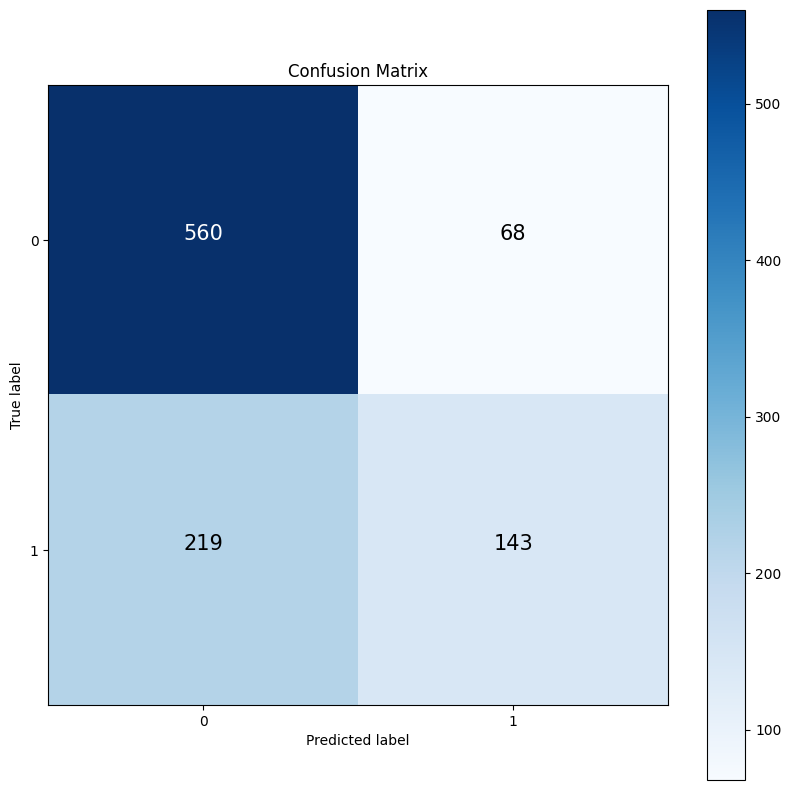

In [56]:
make_confusion_matrix(labels_test_bin, (model1.predict(X_test_features) >= 0.5).astype("int32"))

In [57]:
result_GradientBoost = calculate_results(labels_test_bin, (model1.predict(X_test_features) >= 0.5).astype("int32"))

In [58]:
results.loc['GradientBoost'] = result_GradientBoost

In [59]:
results.head()

,accuracy,precision,recall,f1
GradientBoost,0.710101,0.703825,0.710101,0.687459


## Model **2** : Deep Learning

In [60]:
 model2 = Sequential()
 model2.add(Dense(50, input_shape=(200,), activation='relu'))
 model2.add(Dense(20, activation='relu'))
 model2.add(Dense(5, activation='relu'))
 model2.add(Dropout(0.2))
 model2.add(Dense(1, activation='sigmoid'))
 # Compile model
 model2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.004),
                metrics=['accuracy'])

In [61]:
num_epochs = 6

history_model2  = model2.fit(train_data,
                              validation_data=valid_data,
                              batch_size=128,
                              epochs=num_epochs)

Epoch 1/6
16/16 [==============================] - 3s 29ms/step - loss: 0.6736 - accuracy: 0.6163 - val_loss: 0.6423 - val_accuracy: 0.6340
Epoch 2/6
16/16 [==============================] - 0s 12ms/step - loss: 0.6241 - accuracy: 0.6340 - val_loss: 0.5981 - val_accuracy: 0.6340
Epoch 3/6
16/16 [==============================] - 0s 10ms/step - loss: 0.5650 - accuracy: 0.6734 - val_loss: 0.5446 - val_accuracy: 0.7553
Epoch 4/6
16/16 [==============================] - 0s 14ms/step - loss: 0.5134 - accuracy: 0.7725 - val_loss: 0.5258 - val_accuracy: 0.7381
Epoch 5/6
16/16 [==============================] - 0s 6ms/step - loss: 0.4653 - accuracy: 0.7821 - val_loss: 0.5332 - val_accuracy: 0.7401
Epoch 6/6
16/16 [==============================] - 0s 6ms/step - loss: 0.4333 - accuracy: 0.8129 - val_loss: 0.5458 - val_accuracy: 0.7270


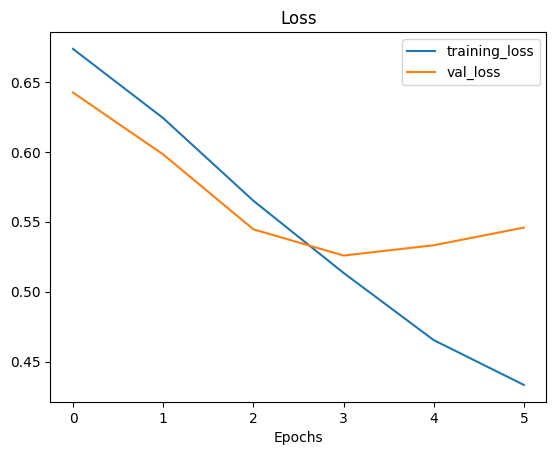

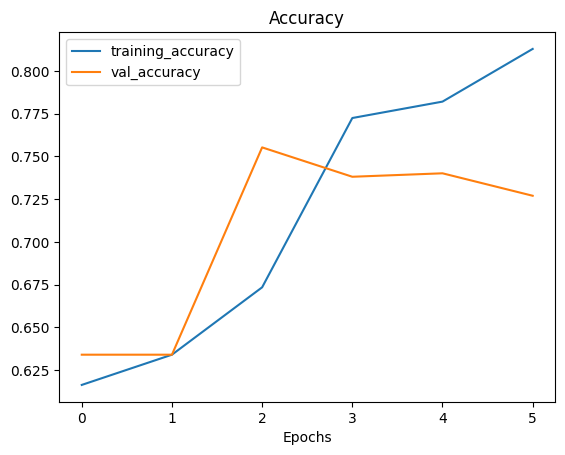

In [63]:
plot_loss_curves(history_model2)

8/8 [==============================] - 0s 3ms/step


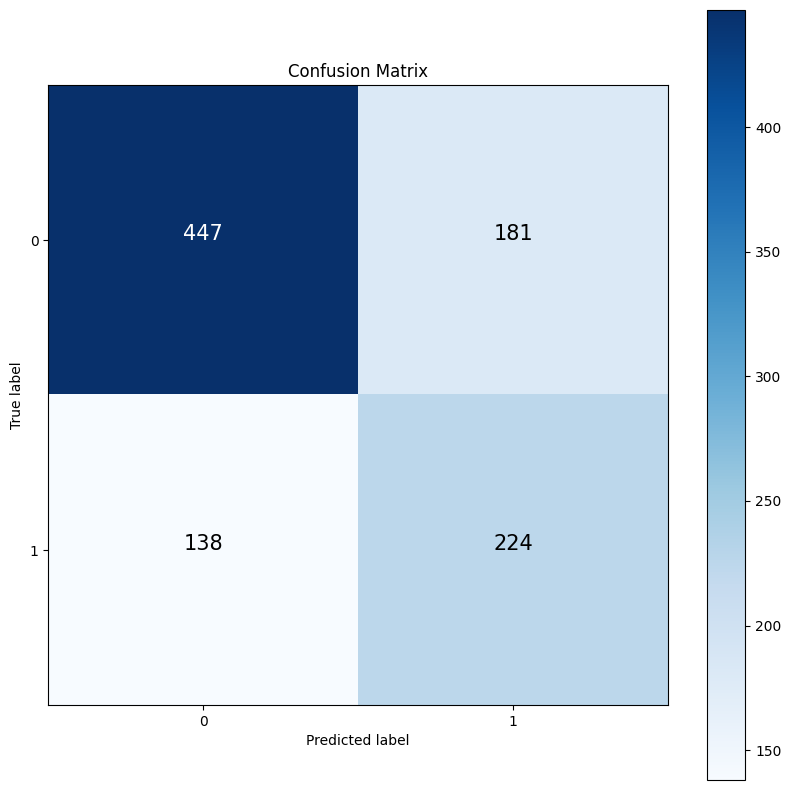

In [64]:
make_confusion_matrix(labels_test_bin, (model2.predict(test_data) >= 0.5).astype("int32"))

In [65]:
results_deeplearning = calculate_results(labels_test_bin, (model2.predict(test_data) >= 0.5).astype("int32"))

8/8 [==============================] - 0s 3ms/step


In [66]:
results.loc['DeepLearning'] = results_deeplearning

## Modelo 3: Deep Learning + Embedding

In [67]:
batch_size = 128
AUTOTUNE = tf.data.AUTOTUNE
train_data = tf.data.Dataset.from_tensor_slices((features_train,labels_train_bin)).batch(batch_size=batch_size).cache().prefetch(buffer_size=AUTOTUNE)
test_data  = tf.data.Dataset.from_tensor_slices((features_test,labels_test_bin)).batch(batch_size=batch_size).cache().prefetch(buffer_size=AUTOTUNE)
valid_data = tf.data.Dataset.from_tensor_slices((features_val ,labels_val_bin)).batch(batch_size=batch_size).cache().prefetch(buffer_size=AUTOTUNE)
for text,label in train_data.take(1):
  print(text)
  print(text.shape)
  print(label)

tf.Tensor(
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]], shape=(128, 236), dtype=int64)
(128, 236)
tf.Tensor(
[0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1
 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0
 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0], shape=(128,), dtype=int64)


In [77]:
embedding_size  = 200
vocabulary_size = len(vocabulary)
max_words       = len(vocabulary)

model3 = Sequential()
model3.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
#model.add(LSTM(60,return_sequences=True))
model3.add(LSTM(90,dropout=0.2))
model3.add(Dense(1, activation='sigmoid'))

print(model3.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 236, 200)          47200     
                                                                 
 lstm_3 (LSTM)               (None, 90)                104760    
                                                                 
 dense_11 (Dense)            (None, 1)                 91        
                                                                 
Total params: 152051 (593.95 KB)
Trainable params: 152051 (593.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [78]:
model3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

In [79]:
num_epochs = 3

history  = model3.fit(train_data,
                      validation_data=valid_data,
                      batch_size=batch_size,
                      epochs=num_epochs)

Epoch 1/3
16/16 [==============================] - 21s 1s/step - loss: 0.6659 - accuracy: 0.6375 - val_loss: 0.6543 - val_accuracy: 0.6340
Epoch 2/3
16/16 [==============================] - 17s 1s/step - loss: 0.6517 - accuracy: 0.6405 - val_loss: 0.6515 - val_accuracy: 0.6340
Epoch 3/3
16/16 [==============================] - 20s 1s/step - loss: 0.6517 - accuracy: 0.6436 - val_loss: 0.6521 - val_accuracy: 0.6309


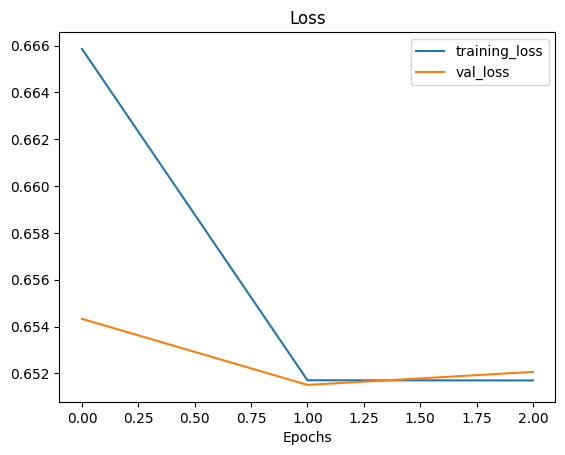

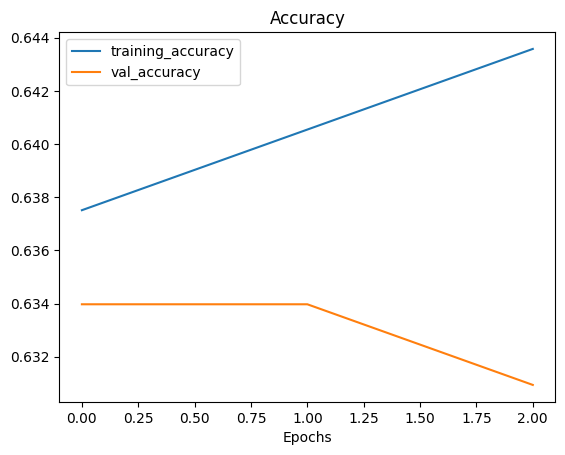

In [80]:
plot_loss_curves(history)

In [81]:
a = model3.predict(test_data)

8/8 [==============================] - 3s 239ms/step


8/8 [==============================] - 2s 234ms/step


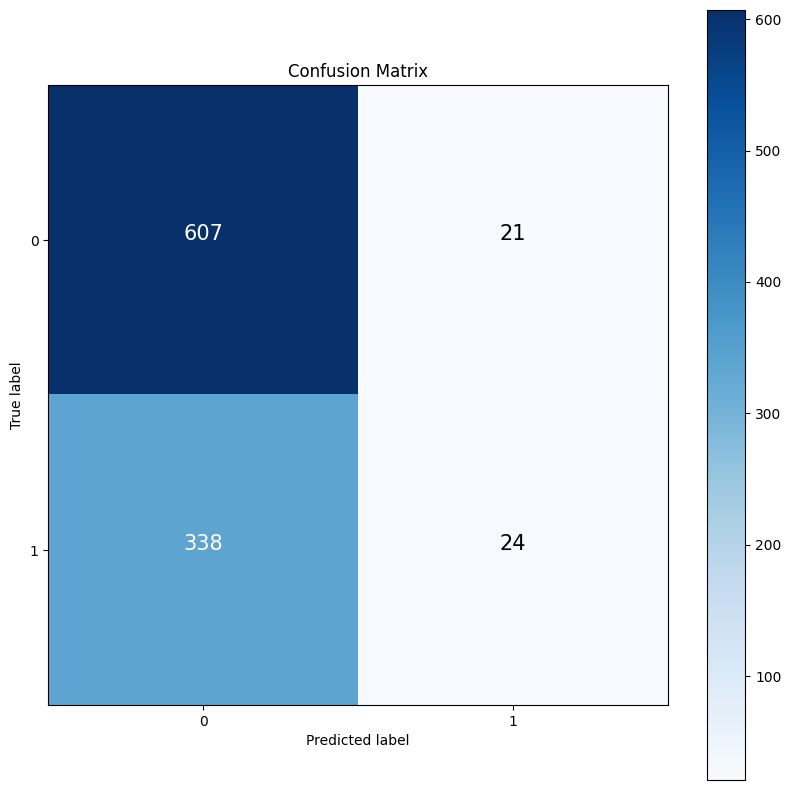

In [82]:
make_confusion_matrix(labels_test_bin, (model3.predict(test_data) >= 0.5).astype("int32"))

In [83]:
calculate_results(labels_test_bin, (model3.predict(test_data) >= 0.5).astype("int32"))

8/8 [==============================] - 2s 230ms/step


{'accuracy': 0.6373737373737374,
 'precision': 0.6024734113623004,
 'recall': 0.6373737373737374,
 'f1': 0.5326936831069062}

In [84]:
results_deeplearningembedding = calculate_results(labels_test_bin, (model3.predict(test_data) >= 0.5).astype("int32"))

8/8 [==============================] - 2s 234ms/step


In [85]:
results.loc['DeepLearningEmbedding'] = results_deeplearningembedding

## Bonus : Otras técnicas

### Modelo 4: Encoder + 2 LSTM Layers

In [86]:
batch_size = 64
train_data = tf.data.Dataset.from_tensor_slices((X_train,labels_train_bin)).batch(batch_size=batch_size).cache().prefetch(buffer_size=AUTOTUNE)
valid_data = tf.data.Dataset.from_tensor_slices((X_val,  labels_val_bin)).batch(batch_size=batch_size).cache().prefetch(buffer_size=AUTOTUNE)
test_data  = tf.data.Dataset.from_tensor_slices((X_test, labels_test_bin)).batch(batch_size=batch_size).cache().prefetch(buffer_size=AUTOTUNE)

In [87]:
# VOCAB_SIZE = 2000
# encoder = tf.keras.layers.TextVectorization(
#     max_tokens=VOCAB_SIZE,
#     ngrams=4,
#     output_sequence_length=75)
# encoder.adapt(train_data.map(lambda text, label: text))


VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_data.map(lambda text, label: text))

In [88]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'i', 'it', 'to', 'and', 'a', 'this', 'is',
       'for', 'of', 'my', 'not', 'in', 'but', 'was', 'that', 'have', 'on'],
      dtype='<U13')

In [89]:
for example, label in train_data.take(1):
  print('texts: ', example.numpy()[:3])
  print()
  print('labels: ', label.numpy()[:3])

texts:  [b"Very flimsy. It didn't even last my dad a week on his trip. My brother had to hold it together with safety pins. I just returned it to Amazon."
 b"I don't see how this box was worth the $35. I mean, it's free so that's good but if I had paid, I would have been upset."
 b"Don't see any way these are going to work. IF you tighten them to stetch, they slide sidways in the shoe. I have had them on a pair of shoes for over a month and nothing is different."]

labels:  [0 0 0]


In [90]:
number = 23
for example, label in train_data.take(1):
  print('texts: ', example.numpy()[number])
  print()
  print("Round-trip: ", " ".join(vocab[  encoder(example)[number].numpy()]))
  print()
  print("encode : ", encoder(example).numpy()[number] )
  print()
  print('labels: ',  label.numpy()[number])


texts:  b"I can't seem to get the hang of using these. I feel like they are working and then suddenly there will be leakage. Could it be user error?"

Round-trip:  i cant seem to get the [UNK] of using these i feel like they are working and then [UNK] there will be [UNK] could it be [UNK] [UNK]                                                                        

encode :  [  3 143 257   5  49   2   1  11  91  31   3 132  33  25  27 230   6 119
   1  85  45  28   1  99   4  28   1   1   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]

labels:  0


In [91]:
model4 = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [92]:
model4.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [93]:
history = model4.fit(train_data,
                    validation_data=valid_data,
                    epochs=3,
                    validation_steps=30)

Epoch 1/3
31/31 [==============================] - ETA: 0s - loss: 0.6897 - accuracy: 0.6345

31/31 [==============================] - 55s 927ms/step - loss: 0.6897 - accuracy: 0.6345 - val_loss: 0.6847 - val_accuracy: 0.6340
Epoch 2/3
31/31 [==============================] - 11s 369ms/step - loss: 0.6778 - accuracy: 0.6345
Epoch 3/3
31/31 [==============================] - 14s 459ms/step - loss: 0.6616 - accuracy: 0.6345


16/16 [==============================] - 12s 211ms/step


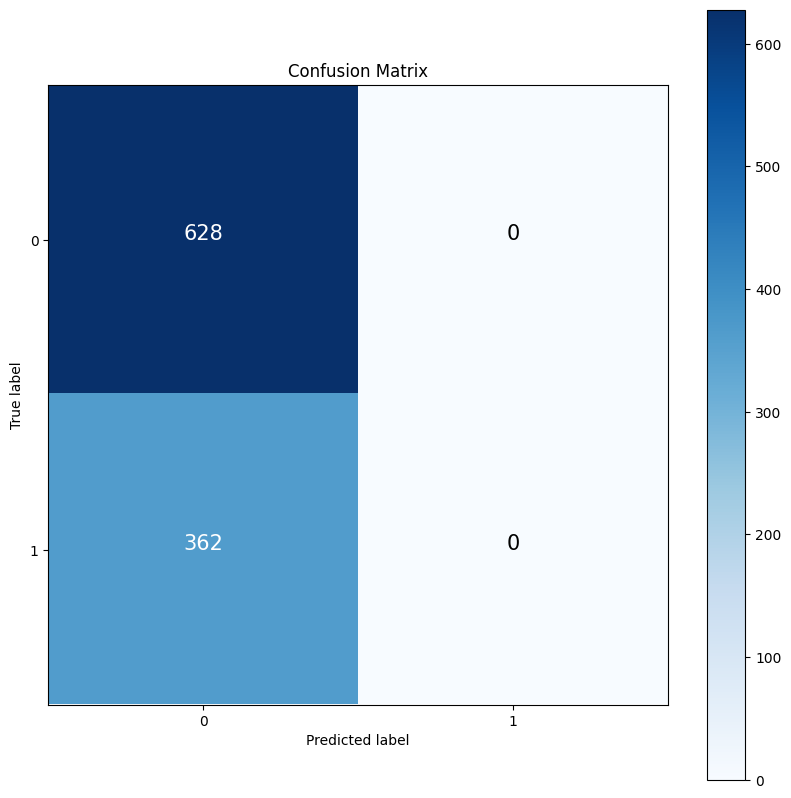

In [95]:
make_confusion_matrix(labels_test_bin, (model4.predict(test_data) >= 0.5).astype("int32"))

In [96]:
results_EncoderLSTM = calculate_results(labels_test_bin, (model4.predict(test_data) >= 0.5).astype("int32"))

16/16 [==============================] - 1s 86ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [97]:
results.loc['EncoderLSTM'] = results_EncoderLSTM

### Model 5 : Universal Sentence Encoder ( Encorder for tensorflow hub)

In [99]:
batch_size = 256
train_data = tf.data.Dataset.from_tensor_slices((X_train,labels_train_bin)).batch(batch_size=batch_size).cache().prefetch(buffer_size=AUTOTUNE)
valid_data = tf.data.Dataset.from_tensor_slices((X_val, labels_val_bin)).batch(batch_size=batch_size).cache().prefetch(buffer_size=AUTOTUNE)
test_data  = tf.data.Dataset.from_tensor_slices((X_test, labels_test_bin)).batch(batch_size=batch_size).cache().prefetch(buffer_size=AUTOTUNE)

In [100]:
# lets look at 3 samples from train set
for text,label in train_data.take(1):
  print(text)
  print(label)

tf.Tensor(
[b"Very flimsy. It didn't even last my dad a week on his trip. My brother had to hold it together with safety pins. I just returned it to Amazon."
 b"I don't see how this box was worth the $35. I mean, it's free so that's good but if I had paid, I would have been upset."
 b"Don't see any way these are going to work. IF you tighten them to stetch, they slide sidways in the shoe. I have had them on a pair of shoes for over a month and nothing is different."
 b"Cuts down on mineral buildup and odors..  Not sure how long they last but great addition so far..  Running tap water and haven't had any issues since installation."
 b'I found it to be too hard and not wide enough. It might be good if the edges tapered because being\nnot so soft they kind of dug into my legs a big which might not have been a if it were wider and the front\nedge tapered.'
 b"Look at legitimate studies and try to avoid the biased websites/information before buying the product. There are studies claiming it

In [101]:
tf.random.set_seed(42)
from tensorflow.keras import layers
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")

In [102]:
model_5 = tf.keras.Sequential([
  sentence_encoder_layer, # take in sentences and then encode them into an embedding
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
], name="model_6_USE")

# Compile model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_5.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_14 (Dense)            (None, 64)                32832     
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [103]:
# Train a classifier on top of pretrained embeddings
model_5_history = model_5.fit(train_data,
                              epochs=10,
                              validation_data=valid_data)

Epoch 1/10
8/8 [==============================] - 7s 190ms/step - loss: 0.6760 - accuracy: 0.6072 - val_loss: 0.6556 - val_accuracy: 0.6350
Epoch 2/10
8/8 [==============================] - 1s 107ms/step - loss: 0.6427 - accuracy: 0.6350 - val_loss: 0.6286 - val_accuracy: 0.6340
Epoch 3/10
8/8 [==============================] - 1s 114ms/step - loss: 0.6161 - accuracy: 0.6365 - val_loss: 0.6045 - val_accuracy: 0.6380
Epoch 4/10
8/8 [==============================] - 1s 110ms/step - loss: 0.5885 - accuracy: 0.6547 - val_loss: 0.5767 - val_accuracy: 0.6845
Epoch 5/10
8/8 [==============================] - 1s 110ms/step - loss: 0.5576 - accuracy: 0.7214 - val_loss: 0.5484 - val_accuracy: 0.7583
Epoch 6/10
8/8 [==============================] - 1s 115ms/step - loss: 0.5282 - accuracy: 0.7902 - val_loss: 0.5227 - val_accuracy: 0.7917
Epoch 7/10
8/8 [==============================] - 1s 117ms/step - loss: 0.5010 - accuracy: 0.8059 - val_loss: 0.5002 - val_accuracy: 0.7958
Epoch 8/10
8/8 [====

4/4 [==============================] - 1s 109ms/step


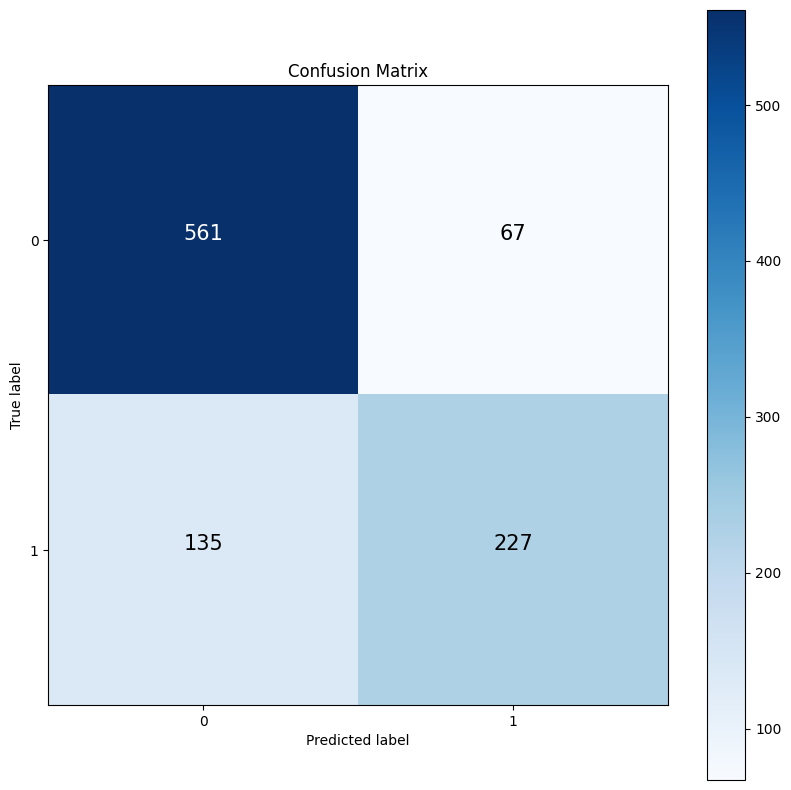

In [104]:
make_confusion_matrix(labels_test_bin, (model_5.predict(test_data) >= 0.5).astype("int32"))

In [105]:
results_UniversalSentenceEncoder = calculate_results(labels_test_bin, (model_5.predict(test_data) >= 0.5).astype("int32"))

4/4 [==============================] - 0s 105ms/step


In [106]:
results.loc['UniversalSentenceEncoder'] = results_UniversalSentenceEncoder

### Model 6 : BERT

In [107]:
AUTOTUNE = tf.data.AUTOTUNE
batch_size = 32
seed = 42

train_data = tf.data.Dataset.from_tensor_slices((X_train,labels_train_bin)).batch(batch_size=batch_size).cache().prefetch(buffer_size=AUTOTUNE)
valid_data = tf.data.Dataset.from_tensor_slices((X_val, labels_val_bin)).batch(batch_size=batch_size).cache().prefetch(buffer_size=AUTOTUNE)
test_data  = tf.data.Dataset.from_tensor_slices((X_test, labels_test_bin)).batch(batch_size=batch_size).cache().prefetch(buffer_size=AUTOTUNE)
# lets look at 3 samples from train set
for text,label in train_data.take(1):
  print(text)
  print(label)

tf.Tensor(
[b"Very flimsy. It didn't even last my dad a week on his trip. My brother had to hold it together with safety pins. I just returned it to Amazon."
 b"I don't see how this box was worth the $35. I mean, it's free so that's good but if I had paid, I would have been upset."
 b"Don't see any way these are going to work. IF you tighten them to stetch, they slide sidways in the shoe. I have had them on a pair of shoes for over a month and nothing is different."
 b"Cuts down on mineral buildup and odors..  Not sure how long they last but great addition so far..  Running tap water and haven't had any issues since installation."
 b'I found it to be too hard and not wide enough. It might be good if the edges tapered because being\nnot so soft they kind of dug into my legs a big which might not have been a if it were wider and the front\nedge tapered.'
 b"Look at legitimate studies and try to avoid the biased websites/information before buying the product. There are studies claiming it

In [108]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3", name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1", trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [109]:
model6 = build_classifier_model()

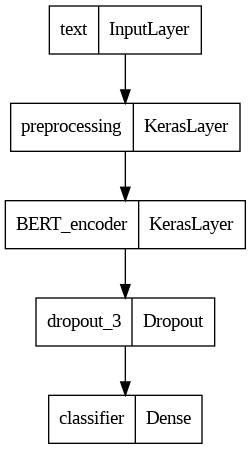

In [111]:
tf.keras.utils.plot_model(model6)

In [112]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [113]:
epochs = 5
steps_per_epoch = tf.data.experimental.cardinality(train_data).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5

optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [114]:
model6.compile(optimizer=optimizer,
               loss=loss,
               metrics=["accuracy"])

In [115]:
print(f'Training model with {"https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1"}')
history = model6.fit(x=train_data,
                     validation_data=valid_data,
                     epochs=epochs)


Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1
Epoch 1/5
62/62 [==============================] - 125s 2s/step - loss: 0.7961 - accuracy: 0.5531 - val_loss: 0.6211 - val_accuracy: 0.6340
Epoch 2/5
62/62 [==============================] - 121s 2s/step - loss: 0.6205 - accuracy: 0.6441 - val_loss: 0.5801 - val_accuracy: 0.6411
Epoch 3/5
62/62 [==============================] - 124s 2s/step - loss: 0.5783 - accuracy: 0.6719 - val_loss: 0.5516 - val_accuracy: 0.6855
Epoch 4/5
62/62 [==============================] - 118s 2s/step - loss: 0.5395 - accuracy: 0.7007 - val_loss: 0.5337 - val_accuracy: 0.7037
Epoch 5/5
62/62 [==============================] - 129s 2s/step - loss: 0.5201 - accuracy: 0.7214 - val_loss: 0.5303 - val_accuracy: 0.7118


31/31 [==============================] - 16s 504ms/step


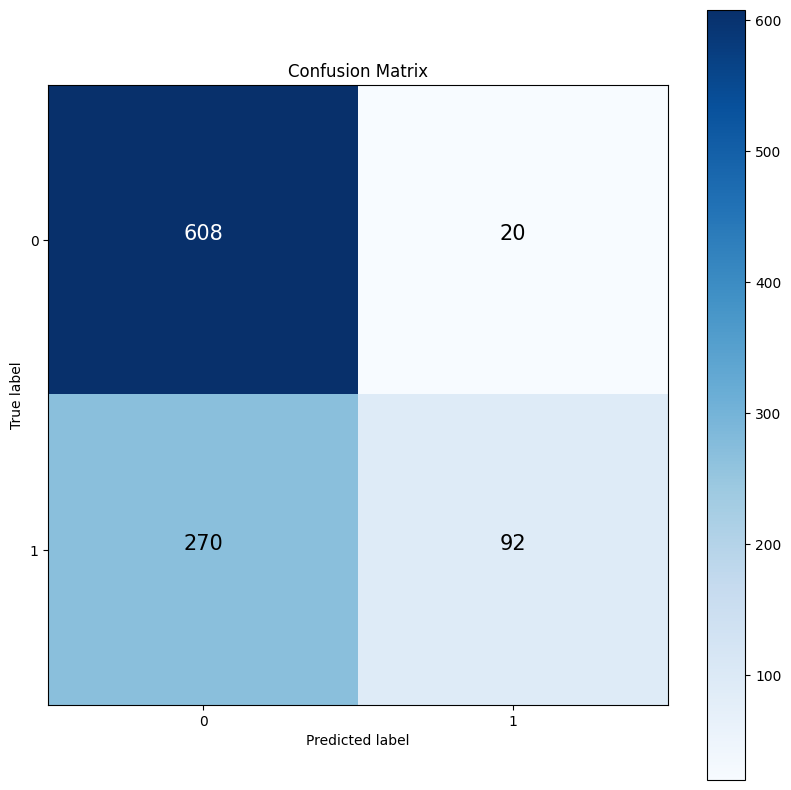

In [116]:
make_confusion_matrix(labels_test_bin, (model6.predict(test_data) >= 0.5).astype("int32"))

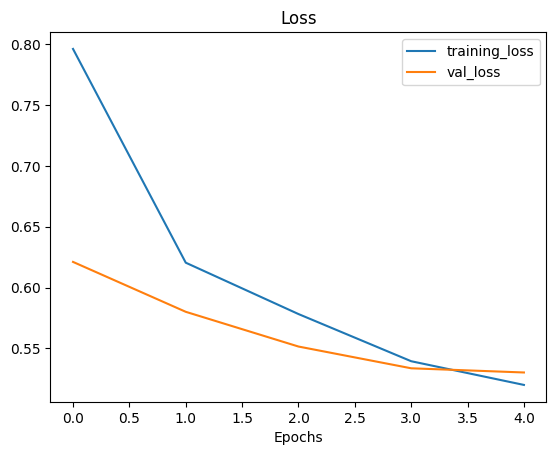

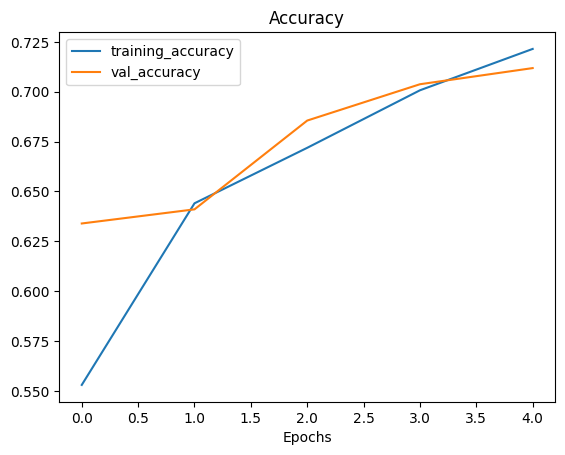

In [117]:
plot_loss_curves(history)

In [118]:
results_Bert = calculate_results(labels_test_bin, (model6.predict(test_data) >= 0.5).astype("int32"))

31/31 [==============================] - 16s 509ms/step


In [119]:
results.loc['Bert'] = results_Bert

# Dataframe resultados

In [120]:
results.to_csv('results_test.csv', sep=';', decimal='.')